In [28]:
import pandas as pd

# path = 'D:/20240416/5. data_analysis_workspace/0_project/음원 데이터를 활용한 주간음원순위 예측.csv'

path = 'D:/20240416/5. data_analysis_workspace/00_project2/음원예측.csv'
data = pd.read_csv(path)

data.head()

,X1,artist,name,rank_g,title_song,week,runtime,top_freq,gg_score,nv_score,...,previous_ranking_200,previous_ranking_30,previous_ranking_40,previous_ranking_50,previous_ranking_60,previous_ranking_70,previous_ranking_80,previous_ranking_90,previous_ranking_nan,rank_g_pred
0,0,10cm,폰서트,90,1,2018-05-13,0.508876,0.240385,0.32,0.485515,...,0,0,0,0,0,0,0,1,0,90.006660
1,1,BLACKPINK,마지막처럼,80,1,2018-05-13,0.553254,0.317308,0.07,0.511548,...,0,0,0,0,0,1,0,0,0,73.234090
2,2,Camila Cabello,Havana,20,1,2018-05-13,0.565089,0.855769,0.33,0.871046,...,0,0,0,0,0,0,0,0,0,23.793497
3,3,Carla Bruni,Stand By Your Man,80,1,2018-05-13,0.408284,0.038462,0.41,0.857812,...,0,0,0,0,0,1,0,0,0,89.114334
4,4,DEAN,instagram,50,1,2018-05-13,0.680473,0.250000,0.48,0.804124,...,0,1,0,0,0,0,0,0,0,35.190857


In [2]:
data.columns

Index(['X1', 'artist', 'name', 'rank_g', 'title_song', 'week', 'runtime',
       'top_freq', 'gg_score', 'nv_score', 'total_view', 'season_genre_score',
       'pd_score', 'dc_total_numb', 'dc_mean_reccomend', 'dc_mean_views',
       'drama_view', 'st_day', 'rank', 'you_rank_g_1', 'you_rank_g_2',
       'you_rank_g_3', 'you_rank_g_4', 'you_rank_g_5', 'you_rank_g_6',
       'you_rank_g_7', 'you_rank_g_8', 'you_rank_g_9', 'you_rank_g_10',
       'genre_All', 'genre_Ani/Game', 'genre_Ballad', 'genre_Blues/Folk',
       'genre_Dance', 'genre_Drama', 'genre_Electronica',
       'genre_Foreign Movie', 'genre_Indi', 'genre_Jazz', 'genre_Pop',
       'genre_R&B/Soul', 'genre_Rap/Hiphop', 'genre_Rock', 'genre_Trot',
       'genre_carol', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'sex_female', 'sex_male', 'sex_mixed',
       'song_type_K_POP', 'song_type_OST', 'song_type_Others', 'song_type_POP',
       'active_type_Band', 'active_type_Duet', 'active_type_Group',
 

In [3]:
data['total_view'].drop_duplicates()

0        0.793178
1        0.847350
2        0.812555
3        0.000000
4        0.787867
           ...   
16335    0.839197
16400    0.938691
16551    0.865062
16604    0.931626
16751    0.862364
Name: total_view, Length: 929, dtype: float64

In [4]:
# Assuming the 'drama_view' column exists in the DataFrame 'df'
# Let's extract the unique values in the 'drama_view' column

unique_drama_views = data['drama_view'].drop_duplicates()

# Display the unique values
unique_drama_views.tolist()


[0.0,
 0.602747636,
 0.636285266,
 0.648074636,
 0.662656623,
 0.671817623,
 0.71030154,
 0.680056299,
 0.73391047,
 0.661998487,
 0.776437663,
 0.802360796,
 0.799563249,
 0.632928464,
 0.842674433,
 0.831599763,
 0.621497343,
 0.665600486,
 0.825914663,
 0.66219608,
 0.858033151,
 0.654493149,
 0.859536843,
 0.654324211,
 0.688376434,
 0.884715038,
 0.43488514,
 0.501694976,
 0.725926345,
 0.507597242,
 0.749144643,
 0.499720314,
 0.7839881,
 0.471114177,
 0.819944653,
 0.524845559,
 0.552569466,
 0.547399876,
 0.279562986,
 0.675020475,
 0.317209397,
 0.775874905,
 0.696413138,
 0.845438402,
 0.657417536,
 0.714754778,
 0.9016837,
 0.645857876,
 0.719523746,
 0.944051964,
 0.717011677,
 0.955405791,
 0.96229564,
 0.50471631,
 0.523645912,
 0.540315992,
 0.491514486,
 0.485580364,
 0.443679436,
 0.50399173,
 0.497960398,
 0.882686562,
 0.911258733,
 0.892006926,
 0.922519434,
 0.923897739,
 0.938655036,
 0.701509347,
 0.957675001,
 0.759744183,
 1.0,
 0.781610272,
 0.726909539,
 0.82

In [5]:
# Sort the dataframe by 'artist', 'name', and 'week' to ensure proper cumulative counting
data = data.sort_values(by=['artist', 'name', 'week'])

# Group by 'artist' and 'name', and then apply a cumulative count on the 'week'
data['cumulative_count'] = data.groupby(['artist', 'name']).cumcount() + 1

# Now create a new column 'cumulative_count_max' that holds the maximum cumulative count for each group
data['cumulative_count_max'] = data.groupby(['artist', 'name'])['cumulative_count'].transform('max')

# Display the updated DataFrame with the new 'cumulative_count_max' column
print(data[['artist', 'name', 'week', 'cumulative_count', 'cumulative_count_max']].head())



      artist    name        week  cumulative_count  cumulative_count_max
59   (여자)아이들  LATATA  2018-05-13               1.0                  23.0
155  (여자)아이들  LATATA  2018-05-20               2.0                  23.0
253  (여자)아이들  LATATA  2018-05-27               3.0                  23.0
352  (여자)아이들  LATATA  2018-06-03               4.0                  23.0
449  (여자)아이들  LATATA  2018-06-10               5.0                  23.0


In [6]:
#로그 
# Apply log transformation to the 'rank_g' column and handle zero or negative values by shifting
import numpy as np

# Assuming your DataFrame is called 'data'
data['rank_g_log'] = np.log1p(data['rank_g'])

# Display the updated DataFrame with the new 'rank_g_log' column
print(data[['rank_g', 'rank_g_log']].head())



     rank_g  rank_g_log
59       10    2.397895
155      10    2.397895
253      10    2.397895
352      10    2.397895
449      10    2.397895


In [7]:
import pandas as pd

# 예시 데이터프레임
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'B']
})

# 더미 변수로 변환
df_dummies = pd.get_dummies(df, columns=['Category'])

print(df_dummies)


   Category_A  Category_B  Category_C
0        True       False       False
1       False        True       False
2       False       False        True
3        True       False       False
4       False        True       False


In [8]:
import pandas as pd

# 예시 데이터프레임
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'B']
})

# get_dummies 사용하여 더미 변수 생성
df_dummies = pd.get_dummies(df, columns=['Category'])

# True/False를 0/1로 변환
df_dummies = df_dummies.astype(int)

print(df_dummies)


   Category_A  Category_B  Category_C
0           1           0           0
1           0           1           0
2           0           0           1
3           1           0           0
4           0           1           0


In [9]:

## 라벨 인코딩 예시
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터 프레임 생성
data = {'색상': ['빨강', '초록', '파랑']}
df = pd.DataFrame(data)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# '색상' 컬럼에 Label Encoding 적용
df['색상_LabelEncoded'] = label_encoder.fit_transform(df['색상'])

print(df)



   색상  색상_LabelEncoded
0  빨강                0
1  초록                1
2  파랑                2


In [31]:
# rank_g 값을 10 = 1, 20 = 2 ... 190 = 19로 변경하는 Label Encoding 코드 작성

# rank_g 값을 10 단위로 나누고, 각 그룹에 1부터 19까지의 레이블 할당
data['rank_g_encoded'] = (data['rank_g'] // 10).clip(upper=19)

# Display the first few rows to check the result
data[['rank_g', 'rank_g_encoded']].head()




,rank_g,rank_g_encoded
0,90,9
1,80,8
2,20,2
3,80,8
4,50,5


In [32]:
#로그 
# Apply log transformation to the 'rank_g' column and handle zero or negative values by shifting
import numpy as np

# Assuming your DataFrame is called 'data'
data['rank_g_log'] = np.log1p(data['rank_g'])

# Display the updated DataFrame with the new 'rank_g_log' column
print(data[['rank_g', 'rank_g_log']].head())


   rank_g  rank_g_log
0      90    4.510860
1      80    4.394449
2      20    3.044522
3      80    4.394449
4      50    3.931826


In [33]:
# 'week' 컬럼을 날짜로 변환
data['week'] = pd.to_datetime(data['week'])

# 계절을 할당하는 함수
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
data['season'] = data['week'].apply(assign_season)

# 장르 리스트
genres = ['genre_Ani/Game', 'genre_Ballad', 'genre_Blues/Folk', 'genre_Dance', 'genre_Drama', 
          'genre_Electronica', 'genre_Foreign Movie', 'genre_Indi', 'genre_Jazz', 'genre_Pop', 
          'genre_R&B/Soul', 'genre_Rap/Hiphop', 'genre_Rock', 'genre_Trot', 'genre_carol']

# 장르별로 계절별 인기도 계산 (rank_g 평균)
genre_popularity_by_season = []

# 각 장르별로 계절별 평균 rank_g 계산
for genre in genres:
    temp_data = data[data[genre] == 1].groupby('season')['rank_g'].mean().reset_index()
    temp_data['genre'] = genre
    genre_popularity_by_season.append(temp_data)

# 결과를 하나의 데이터프레임으로 합침
genre_popularity_by_season_df = pd.concat(genre_popularity_by_season, ignore_index=True)

# 장르별 계절에 따른 인기도 출력
genre_popularity_by_season_df.head()


,season,rank_g,genre
0,가을,120.500000,genre_Ani/Game
1,겨울,92.157895,genre_Ani/Game
2,봄,142.142857,genre_Ani/Game
3,여름,138.620690,genre_Ani/Game
4,가을,67.319767,genre_Ballad


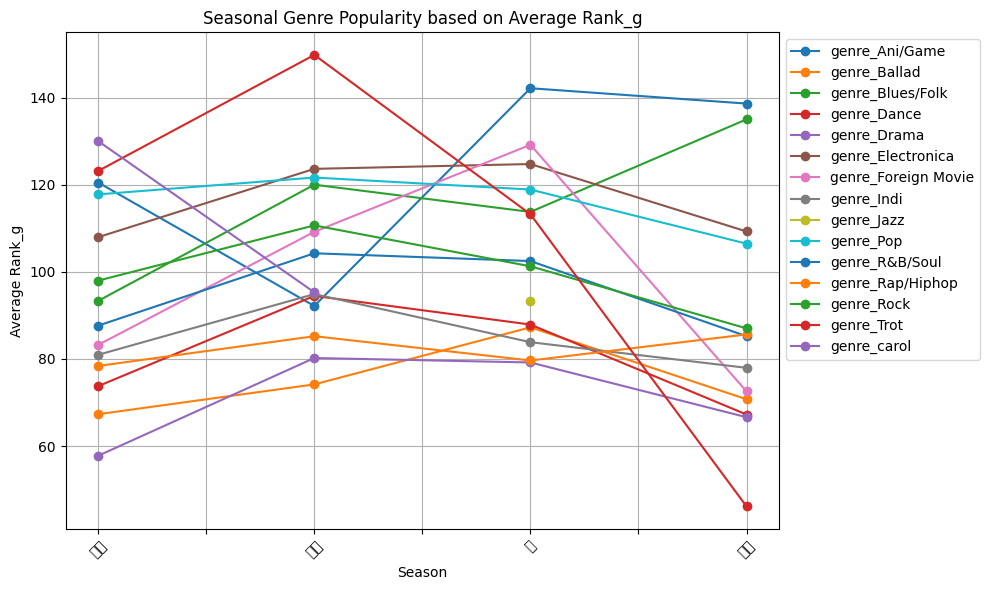

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 'week' 컬럼을 날짜로 변환
data['week'] = pd.to_datetime(data['week'])

# 계절을 할당하는 함수
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
data['season'] = data['week'].apply(assign_season)

# 장르 리스트
genres = ['genre_Ani/Game', 'genre_Ballad', 'genre_Blues/Folk', 'genre_Dance', 'genre_Drama', 
          'genre_Electronica', 'genre_Foreign Movie', 'genre_Indi', 'genre_Jazz', 'genre_Pop', 
          'genre_R&B/Soul', 'genre_Rap/Hiphop', 'genre_Rock', 'genre_Trot', 'genre_carol']

# 장르별로 계절별 인기도 계산 (rank_g 평균)
genre_popularity_by_season = []

# 각 장르별로 계절별 평균 rank_g 계산
for genre in genres:
    temp_df = data[data[genre] == 1].groupby('season')['rank_g'].mean().reset_index()
    temp_df['genre'] = genre
    genre_popularity_by_season.append(temp_df)

# 결과를 하나의 데이터프레임으로 합침
genre_popularity_by_season_df = pd.concat(genre_popularity_by_season, ignore_index=True)

# 그래프를 그리기 위해 각 계절에 따른 장르별 순위를 피벗 테이블로 변환
pivot_df = genre_popularity_by_season_df.pivot(index='season', columns='genre', values='rank_g')

# 그래프 그리기
pivot_df.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Seasonal Genre Popularity based on Average Rank_g')
plt.xlabel('Season')
plt.ylabel('Average Rank_g')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()


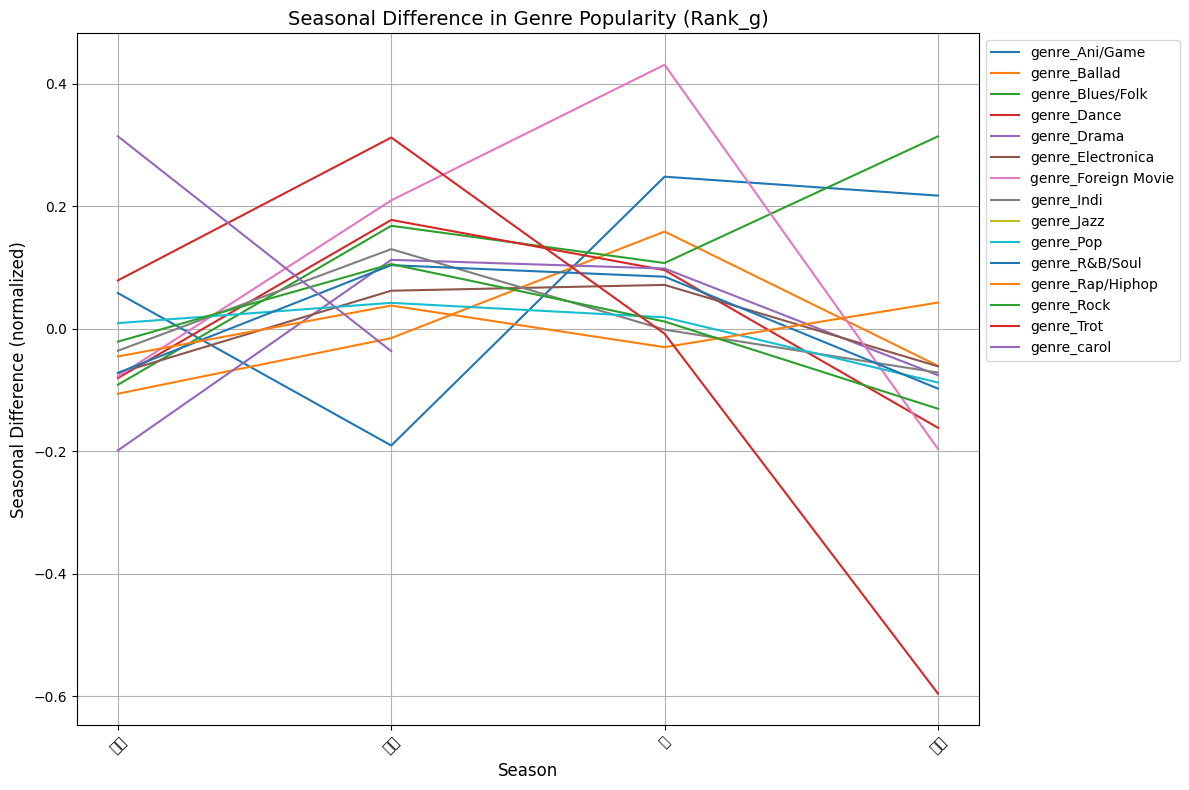

In [36]:
import matplotlib.pyplot as plt

# 'df'를 'data'로 변경
data['week'] = pd.to_datetime(data['week'])

# 계절을 할당하는 함수
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
data['season'] = data['week'].apply(assign_season)

# 장르 리스트
genres = ['genre_Ani/Game', 'genre_Ballad', 'genre_Blues/Folk', 'genre_Dance', 'genre_Drama', 
          'genre_Electronica', 'genre_Foreign Movie', 'genre_Indi', 'genre_Jazz', 'genre_Pop', 
          'genre_R&B/Soul', 'genre_Rap/Hiphop', 'genre_Rock', 'genre_Trot', 'genre_carol']

# 장르별로 계절별 평균 rank_g 계산
genre_season_mean = []

for genre in genres:
    # 계절별 장르 평균 rank_g 계산
    temp_data = data[data[genre] == 1].groupby('season')['rank_g'].mean().reset_index()
    temp_data['genre'] = genre
    genre_season_mean.append(temp_data)

# 계절별 평균을 하나의 데이터프레임으로 합침
genre_season_mean_df = pd.concat(genre_season_mean, ignore_index=True)

# 각 장르의 전체 평균 rank_g 계산
genre_mean = data[genres].apply(lambda x: data.loc[data[x.name] == 1, 'rank_g'].mean(), axis=0).reset_index()
genre_mean.columns = ['genre', 'genre_mean']

# 장르별 계절 평균과 전체 평균을 병합
result_data = genre_season_mean_df.merge(genre_mean, left_on='genre', right_on='genre')

# 파생 변수 생성: ((mean seasonal rank - genre mean rank) / genre mean rank)
result_data['seasonal_diff'] = ((result_data['rank_g'] - result_data['genre_mean']) / result_data['genre_mean'])

# 그래프로 시각화
plt.figure(figsize=(12, 8))

for genre in genres:
    genre_data = result_data[result_data['genre'] == genre]
    plt.plot(genre_data['season'], genre_data['seasonal_diff'], label=genre)

plt.title('Seasonal Difference in Genre Popularity (Rank_g)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Seasonal Difference (normalized)', fontsize=12)
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()


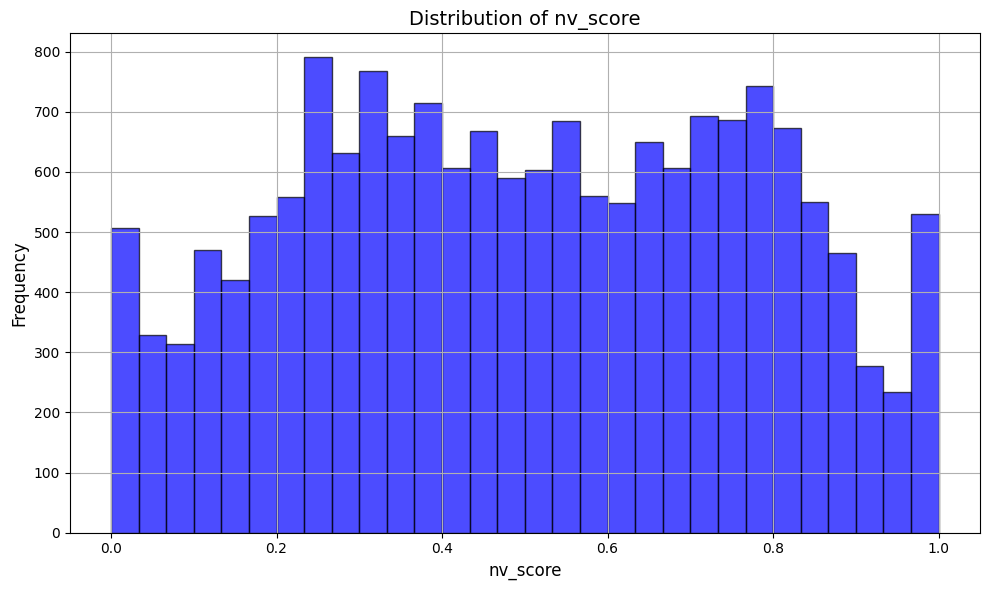

In [37]:
# nv_score를 시각화하는 그래프 작성

import matplotlib.pyplot as plt

# nv_score의 분포를 시각화
plt.figure(figsize=(10, 6))

# nv_score 그래프화
plt.hist(data['nv_score'], bins=30, alpha=0.7, color='blue', edgecolor='black')

# 그래프에 제목과 축 레이블 추가
plt.title('Distribution of nv_score', fontsize=14)
plt.xlabel('nv_score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()


## 정규화해서 이상치 값 제외하고 정규분포형태를 띄게 만들었다.

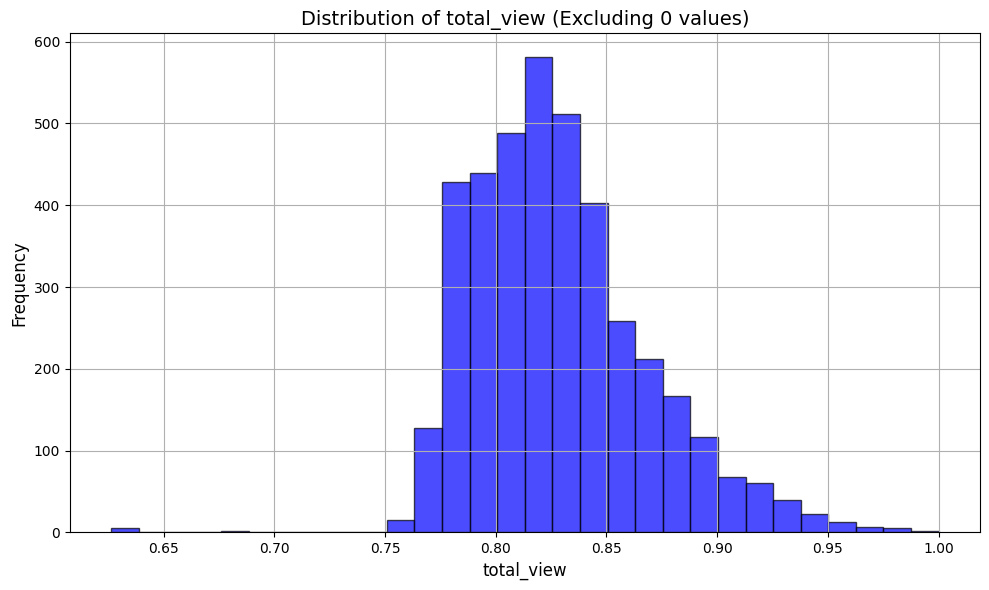

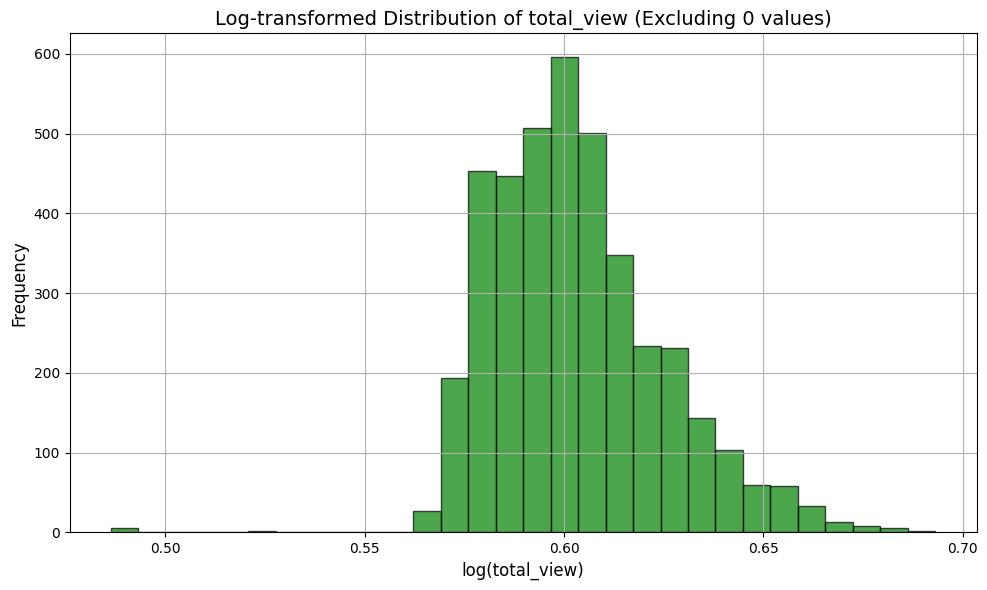

In [38]:

# total_view에서 0 값을 제외한 데이터만 추출
non_zero_total_view = data[data['total_view'] > 0]['total_view']

# 원본 데이터의 분포를 0값을 제외하고 그래프로 시각화
plt.figure(figsize=(10, 6))

# total_view 그래프화 (0값 제외)
plt.hist(non_zero_total_view, bins=30, alpha=0.7, color='blue', edgecolor='black')

# 그래프에 제목과 축 레이블 추가
plt.title('Distribution of total_view (Excluding 0 values)', fontsize=14)
plt.xlabel('total_view', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()

# 로그 변환 후 시각화 (0 값을 제외한 total_view)
log_non_zero_total_view = np.log1p(non_zero_total_view)

plt.figure(figsize=(10, 6))

# 로그 변환된 total_view 그래프화
plt.hist(log_non_zero_total_view, bins=30, alpha=0.7, color='green', edgecolor='black')

# 그래프에 제목과 축 레이블 추가
plt.title('Log-transformed Distribution of total_view (Excluding 0 values)', fontsize=14)
plt.xlabel('log(total_view)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()


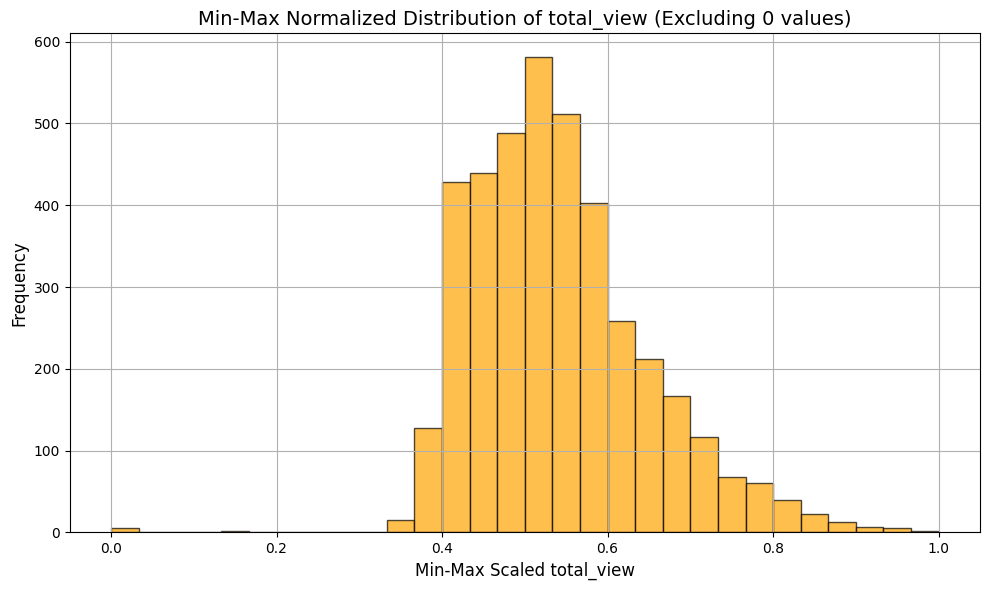

In [39]:
# Min-Max 정규화 적용
from sklearn.preprocessing import MinMaxScaler

# 0 값을 제외한 total_view 데이터를 사용하여 Min-Max 정규화
scaler = MinMaxScaler()
min_max_total_view = scaler.fit_transform(non_zero_total_view.values.reshape(-1, 1))

# Min-Max 정규화된 데이터를 시각화
plt.figure(figsize=(10, 6))

# Min-Max 정규화된 total_view 그래프화
plt.hist(min_max_total_view, bins=30, alpha=0.7, color='orange', edgecolor='black')

# 그래프에 제목과 축 레이블 추가
plt.title('Min-Max Normalized Distribution of total_view (Excluding 0 values)', fontsize=14)
plt.xlabel('Min-Max Scaled total_view', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()


# Linear Regression / Random Forest / Catboost / XGboost 
#### 선형회귀 
- 선형회귀의 주의할점 : 이상치에 민감하기때문에 결측값 제거

#### random forest
- 랜덤포레스트 주의할점 1: 변수를 대체로 label encoding으로 충분 즉 숫자형으로변환
- 랜덤포레스트 주의할점 2: 결측값 제거하거나 중앙값으로 대체하는등의처리필요
- 랜덤포레스트 주의할점 3: 적절한 파라미터 규제 필요  트리기반이기에 과적합가능성 높다
-                           (max_depth, n_estimators, min_samples_split 등), 학습속도가 느려 n_jops 적극활용

#### catboost ( 잘 사용하면 좋다 ...잘)
- 캣부스트 장점 : 카테고리형 데이터 직접처리 cat_features인자로 자동 설정 
- 캣부스트 장점 : 결측값 처리가 필요하지 않다 
- 캣부스트 주의할점 :  과적합에 덜 민감하지만,하이퍼파라미터 조정 필요 특히 learning_rate, iterations, depth
- 캣부스트 장점 : GPU 기본 지원  속도가 빠르다!?

- 캣부스트 단점 :  CatBoost는 고도로 최적화된 모델이지만, 결과적으로 모델 해석이 복잡할 수 있습니다. 
                    트리 기반 모델이라 하더라도 변수의 중요도나 의사결정 과정을 해석하는 것이
                    단순한 회귀 모델이나 선형 모델보다 어렵습니다.   즉  최적화에 고도화된만큼 해석이 복잡하다.
- 캣부스트 단점 :  CatBoost의 하이퍼파라미터 튜닝에 대한 자료나 예시가 다소 부족

#### XGBoost 
- 엑스지부스트 단점 : label encoding 이나 one-hot encoding 으로 변환 필수   카테고리 처리x
- 엑스지부스트 단점 : 과접합의 위험이있다
                        max_depth, learning_rate, n_estimators, gamma 등의 하이퍼파라미터를 신중하게 조정
- 엑스지부스트 단점 : 학습속도가 느릴 수 있다 n_jops와 gpu_hist선택사용

- 엑스지부스트 장점 : 정답과 예측값 사이 차이를 줄이는 손실함수중 로지스틱 손실함수사용
                        이진 분류 문제에서 XGBoost 정답이 참일 확률을 비선형적 방식으로 계산 이를 기반 학습
                        복잡한 데이터 패턴에서 강하다

#### XGBOOST 나 랜덤포레스트는 데이터 스케일링 필요 없지 BUT
#### 선형회귀에서는 데이터 스케일링이 필요하다 standardscaler 나 minmaxscaler로 스케일링
#### standard scaler는 데이터평균0 표준편차를1 정규분포를 따를때 유용 즉 Z-Score 정규화
#### minmaxsclaer는 데이터 0과 1사이 범위로 각 피처의 최소값1 최대값1 이방법은 정규화라고도불린다 즉 민맥스정규화


#### 만약 다른 거리 기반 모델(예: k-NN, 선형 회귀, SVM 등)과 같은 알고리즘을 사용할 계획이 있다면, 이때는 One-Hot - Encoding을 사용하는 것이 일반적입니다. 이유는 이들 모델에서 숫자 간의 크기나 거리가 중요하기 때문입니다

# Linear Regression / Random Forest / Catboost / XGboost  끝~

# GridSearchCV나 RandomizedSearchCV 하이퍼파라미터

#### GridSearchCV
- 장점 : 2개의 하이퍼파라미터 각각 3개의 값을 가지면 총 9개의 조합을 탐색 즉 최적의 파라미터 확실
- 단점 : 값이 많거나 복잡할수록 시간이 오래걸림

#### RandomizedSearchCV
- 장점 : 속도 빠름, 지정된 파라미터 범위내에서 랜덤으로 시도
- 단점 : 최적화 찾기가 힘들다. 적절하게 조절필요.

Test Set Mean Squared Error: 314.786
                 Feature  Importance
54    previous_ranking_1    0.140737
0                     X1    0.106945
55   previous_ranking_10    0.101042
66   previous_ranking_20    0.099646
68   previous_ranking_30    0.084053
..                   ...         ...
13          you_rank_g_2    0.000131
28     genre_Electronica    0.000054
67  previous_ranking_200    0.000031
31            genre_Jazz    0.000023
25      genre_Blues/Folk    0.000017

[76 rows x 2 columns]


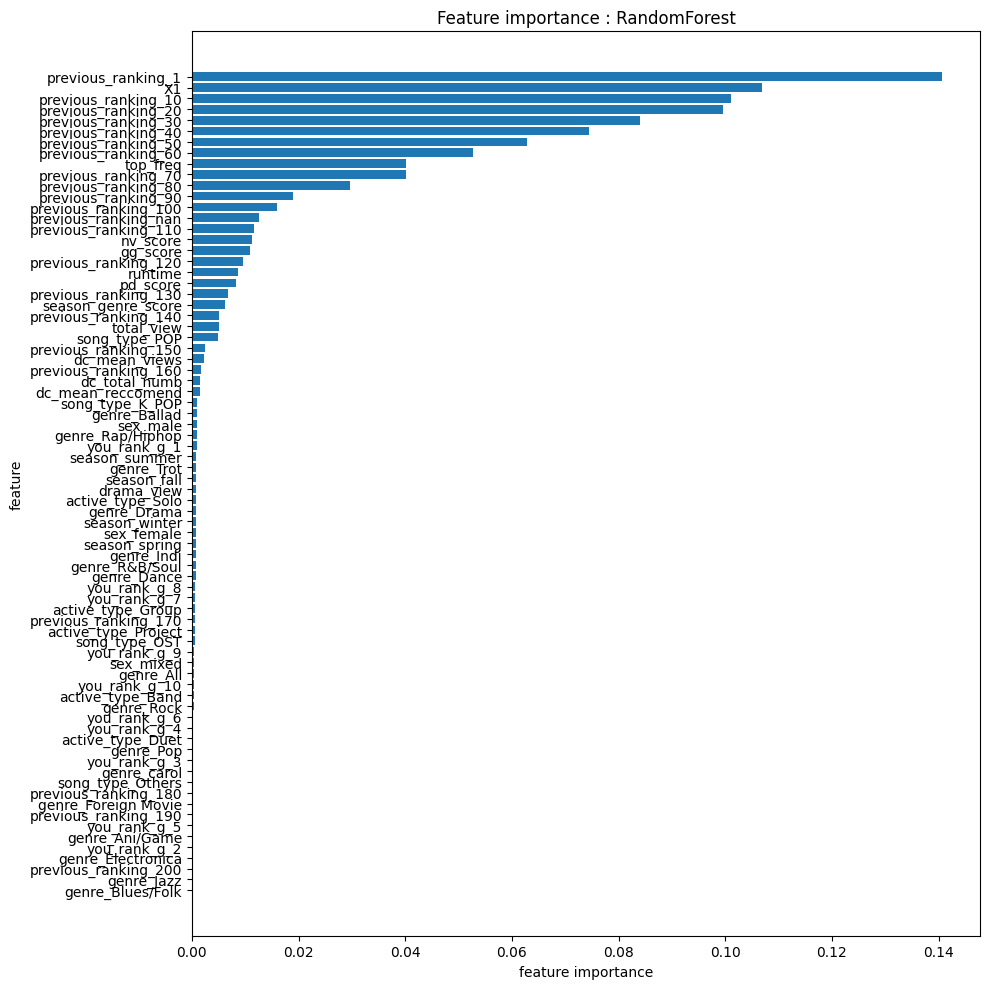

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = pd.read_csv('D:/20240416/5. data_analysis_workspace/00_project2/음원예측.csv')

# 필요없는 열 삭제 (순위를 직접 나타내는 변수 제거)
X = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred','rank_g'])

# 목표 변수 정의
y = data['rank']

# 변수 스케일링 (모든 변수 값이 비슷한 범위에 있도록)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용(train)과 테스트용(test) 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# 랜덤 포레스트 모델 설정 (트리 수를 100으로 설정)
f_model = RandomForestRegressor(random_state=1, n_estimators=100)

# 모델 학습
f_model.fit(X_train, y_train)

# 테스트 데이터에 대한 순위 예측
pred_y = f_model.predict(X_test)

# 테스트 성능 평가 (평균 제곱 오차)
mse_test = mean_squared_error(y_test, pred_y)
print(f"Test Set Mean Squared Error: {mse_test:.3f}")

# 변수 중요도 확인
importances = f_model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 정리
feature_names = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.title('Feature importance : RandomForest')
plt.gca().invert_yaxis()  # 가장 중요한 변수가 위로 오도록 y축을 반전
plt.tight_layout()

# 그래프 저장 및 출력
plt.savefig('feature_importance.png')  # 그래프를 이미지로 저장
plt.show()

# 필요에 따라 변수 중요도를 CSV로 저장
importance_df.to_csv('feature_importances.csv', index=False)

Test Set Mean Squared Error: 334.358
                Feature  Importance
54   previous_ranking_1   14.400811
55  previous_ranking_10   10.209051
66  previous_ranking_20    9.460462
68  previous_ranking_30    7.125064
0                    X1    6.478678
..                  ...         ...
22            genre_All    0.000000
50     active_type_Duet    0.000000
52  active_type_Project    0.000000
20         you_rank_g_9    0.000000
38          season_fall    0.000000

[76 rows x 2 columns]


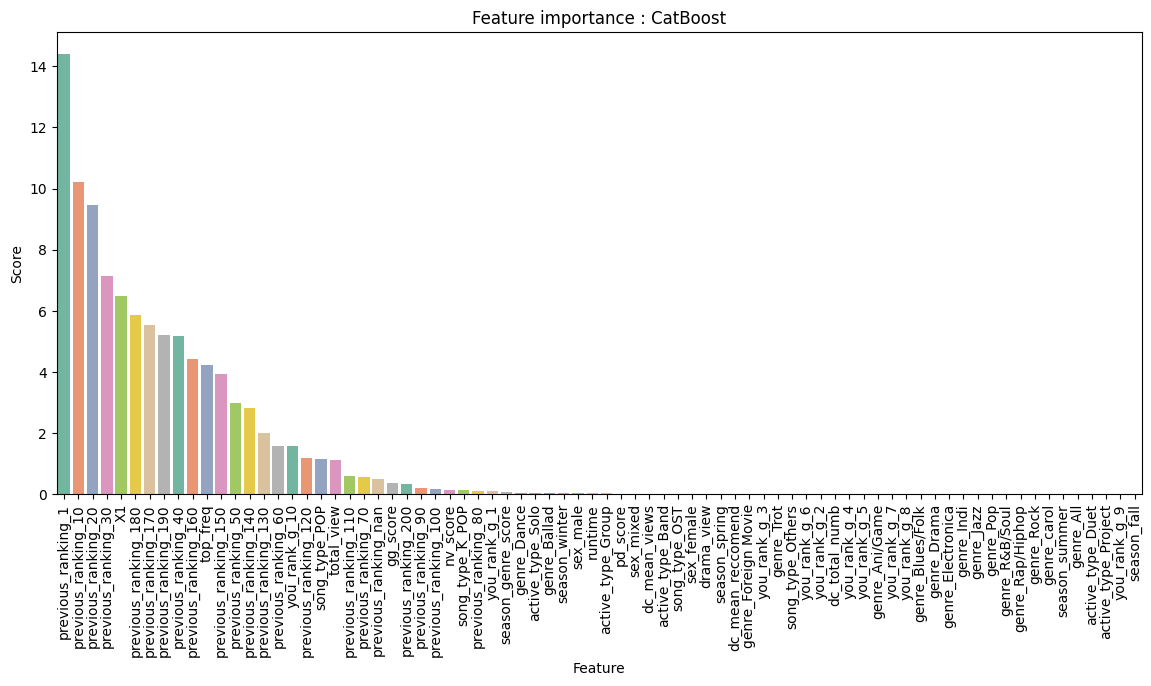

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor

# 데이터 로드
data = pd.read_csv('D:/20240416/5. data_analysis_workspace/00_project2/음원예측.csv')

# 필요없는 열 삭제 (순위를 직접 나타내는 변수 제거)
X = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g'])

# 목표 변수 정의
y = data['rank']

# 변수 스케일링 (모든 변수 값이 비슷한 범위에 있도록)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용(train)과 테스트용(test) 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# CatBoost 모델 설정
cat_model = CatBoostRegressor(random_state=1, iterations=100, learning_rate=0.1, depth=6, verbose=0)

# 모델 학습
cat_model.fit(X_train, y_train)

# 테스트 데이터에 대한 순위 예측
pred_y = cat_model.predict(X_test)

# 테스트 성능 평가 (평균 제곱 오차)
mse_test = mean_squared_error(y_test, pred_y)
print(f"Test Set Mean Squared Error: {mse_test:.3f}")

# 변수 중요도 확인
importances = cat_model.get_feature_importance()

# 피처 이름과 중요도를 데이터프레임으로 정리
feature_names = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)

# 변수 중요도 시각화 (seaborn 스타일 적용)
plt.figure(figsize=(14, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='Set2')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.xticks(rotation=90)  # x축 레이블을 회전시켜 읽기 쉽게 만듦
plt.title('Feature importance : CatBoost')

# 그래프 저장 및 출력
plt.savefig('catboost_feature_importance_custom.png')  # 그래프를 이미지로 저장
plt.show()

# 필요에 따라 변수 중요도를 CSV로 저장
importance_df.to_csv('catboost_feature_importances.csv', index=False)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = pd.read_csv('D:/20240416/5. data_analysis_workspace/00_project2/음원예측.csv')

# 필요없는 열 삭제 (순위를 직접 나타내는 변수 제거)
X = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g'])

# 목표 변수 정의
y = data['rank']

# 변수 스케일링 (모든 변수 값이 비슷한 범위에 있도록)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용(train)과 테스트용(test) 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# 랜덤 포레스트 모델 설정 및 하이퍼파라미터 튜닝을 위한 그리드 설정
param_grid = {
    'n_estimators': [50, 100],  # 트리 수
    'max_depth': [None, 10, 20],  # 최대 깊이
    'min_samples_split': [20],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드의 최소 샘플 수

    # 부트스트랩 샘플링 여부  (부트스트랩 True 데이터중복허용 기본설정)(false일시 과적합 위험있으나 성능이 더좋을수도)
    'bootstrap': [True, False]  
}

# GridSearchCV 설정 (교차검증 3회, 랜덤 포레스트 모델 사용)
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                           param_grid=param_grid,
                           cv=3,  # 교차 검증 횟수
                           n_jobs=-1,  # 병렬 처리
                           scoring='neg_mean_squared_error',  # 성능 지표
                           verbose=2)

# 하이퍼파라미터 튜닝 및 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 테스트 데이터에 대한 예측
best_model = grid_search.best_estimator_
pred_y = best_model.predict(X_test)

# 테스트 성능 평가 (평균 제곱 오차)
mse_test = mean_squared_error(y_test, pred_y)
print(f"Test Set Mean Squared Error: {mse_test:.3f}")

# 변수 중요도 확인
importances = best_model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 정리
feature_names = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.title('Feature importance : RandomForest')
plt.gca().invert_yaxis()  # 가장 중요한 변수가 위로 오도록 y축을 반전
plt.tight_layout()

# 그래프 저장 및 출력
plt.savefig('feature_importance.png')  # 그래프를 이미지로 저장
plt.show()

# 필요에 따라 변수 중요도를 CSV로 저장
importance_df.to_csv('feature_importances.csv', index=False)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 196}
Test Set Mean Squared Error: 302.070
                Feature    Importance
54   previous_ranking_1  1.454697e-01
0                    X1  1.084291e-01
55  previous_ranking_10  1.035401e-01
66  previous_ranking_20  1.024118e-01
68  previous_ranking_30  8.662820e-02
..                  ...           ...
28    genre_Electronica  1.412310e-05
37          genre_carol  2.664143e-06
47     song_type_Others  1.004466e-06
25     genre_Blues/Folk  1.774647e-08
31           genre_Jazz  0.000000e+00

[76 rows x 2 columns]


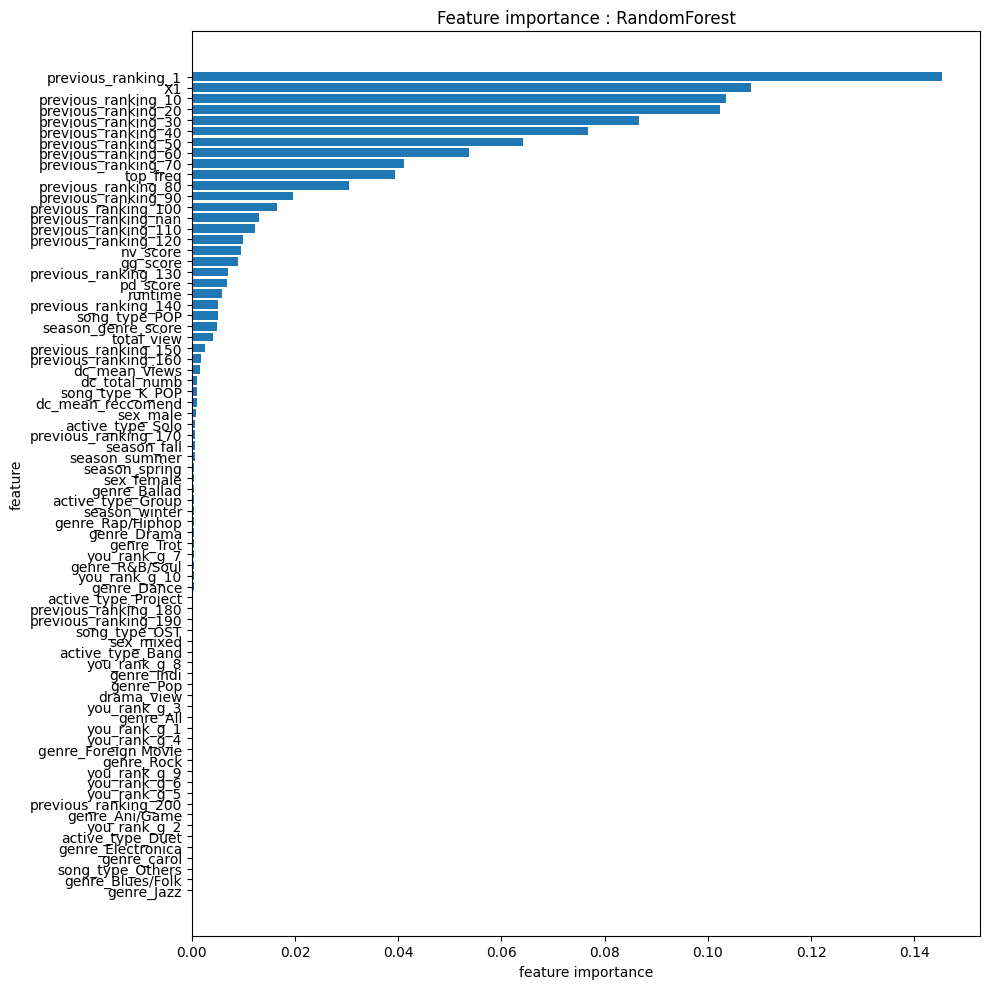

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# 데이터 로드
data = pd.read_csv('D:/20240416/5. data_analysis_workspace/00_project2/음원예측.csv')

# 필요없는 열 삭제 (순위를 직접 나타내는 변수 제거)
X = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g'])

# 목표 변수 정의
y = data['rank']

# 변수 스케일링 (모든 변수 값이 비슷한 범위에 있도록)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용(train)과 테스트용(test) 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# 랜덤 포레스트 모델 설정 및 하이퍼파라미터 튜닝을 위한 랜덤 서치 설정
param_distributions = {
    'n_estimators': randint(50, 200),  # 트리 수
    'max_depth': [None, 10, 20, 30],  # 최대 깊이
    'min_samples_split': randint(2, 11),  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': randint(1, 5),  # 리프 노드의 최소 샘플 수

    # 부트스트랩 샘플링 여부  (부트스트랩 True 데이터중복허용 기본설정)(false일시 과적합 위험있으나 성능이 더좋을수도)
    'bootstrap': [True, False] 
}

# RandomizedSearchCV 설정 (교차검증 3회, 랜덤 포레스트 모델 사용)
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=1),
                                   param_distributions=param_distributions,
                                   n_iter=50,  # 시도할 하이퍼파라미터 조합의 개수
                                   cv=3,  # 교차 검증 횟수
                                   n_jobs=-1,  # 병렬 처리
                                   scoring='neg_mean_squared_error',  # 성능 지표
                                   verbose=2,
                                   random_state=1)

# 하이퍼파라미터 튜닝 및 모델 학습
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {random_search.best_params_}")

# 최적의 모델로 테스트 데이터에 대한 예측
best_model = random_search.best_estimator_
pred_y = best_model.predict(X_test)

# 테스트 성능 평가 (평균 제곱 오차)
mse_test = mean_squared_error(y_test, pred_y)
print(f"Test Set Mean Squared Error: {mse_test:.3f}")

# 변수 중요도 확인
importances = best_model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 정리
feature_names = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.title('Feature importance : RandomForest')
plt.gca().invert_yaxis()  # 가장 중요한 변수가 위로 오도록 y축을 반전
plt.tight_layout()

# 그래프 저장 및 출력
plt.savefig('feature_importance.png')  # 그래프를 이미지로 저장
plt.show()

# 필요에 따라 변수 중요도를 CSV로 저장
importance_df.to_csv('feature_importances.csv', index=False)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import catboost as cb
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

# RMSE 계산 함수
def calculate_rmse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_y))
    return rmse

# 1. Linear Regression
lr_model = LinearRegression()
lr_rmse = calculate_rmse(lr_model, X_train, X_test, y_train, y_test)
print(f"Linear Regression RMSE: {lr_rmse:.3f}")

# 2. Random Forest
rf_model = RandomForestRegressor(random_state=1, n_estimators=100)
rf_rmse = calculate_rmse(rf_model, X_train, X_test, y_train, y_test)
print(f"Random Forest RMSE: {rf_rmse:.3f}")

# 3. CatBoost
catboost_model = cb.CatBoostRegressor(verbose=0, random_state=1)
catboost_rmse = calculate_rmse(catboost_model, X_train, X_test, y_train, y_test)
print(f"CatBoost RMSE: {catboost_rmse:.3f}")

# 4. XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)
xgboost_rmse = calculate_rmse(xgboost_model, X_train, X_test, y_train, y_test)
print(f"XGBoost RMSE: {xgboost_rmse:.3f}")


Linear Regression RMSE: 20.738
Random Forest RMSE: 17.742
CatBoost RMSE: 16.735
XGBoost RMSE: 17.503


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import catboost as cb
import xgboost as xgb

# 데이터 로드
data = pd.read_csv('D:/20240416/5. data_analysis_workspace/00_project2/음원예측.csv')

# 필요없는 열 삭제 (순위를 직접 나타내는 변수 제거)
X = data.drop(columns=['rank', 'artist', 'name', 'week', 'title_song', 'st_day', 'rank_g_pred', 'rank_g'])
y = data['rank']

# 변수 스케일링 (모든 변수 값이 비슷한 범위에 있도록)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용(train)과 테스트용(test) 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# RMSE 계산 함수
def calculate_rmse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_y))
    return rmse

# 1. Linear Regression
lr_model = LinearRegression()
lr_rmse = calculate_rmse(lr_model, X_train, X_test, y_train, y_test)
print(f"Linear Regression RMSE: {lr_rmse:.3f}")

# 2. Random Forest
rf_model = RandomForestRegressor(random_state=1, n_estimators=100)
rf_rmse = calculate_rmse(rf_model, X_train, X_test, y_train, y_test)
print(f"Random Forest RMSE: {rf_rmse:.3f}")

# 3. CatBoost
catboost_model = cb.CatBoostRegressor(verbose=0, random_state=1)
catboost_rmse = calculate_rmse(catboost_model, X_train, X_test, y_train, y_test)
print(f"CatBoost RMSE: {catboost_rmse:.3f}")

# 4. XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)
xgboost_rmse = calculate_rmse(xgboost_model, X_train, X_test, y_train, y_test)
print(f"XGBoost RMSE: {xgboost_rmse:.3f}")


Linear Regression RMSE: 20.738
Random Forest RMSE: 17.742
CatBoost RMSE: 16.735
XGBoost RMSE: 17.503
